In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import nbconvert

In [81]:
# Import dataset
path = "C:/Users/14027/Documents/Graduate_Schoolish/DSC_630/student dropout.csv"
drop = pd.read_csv(path)
drop.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [82]:
# Check for missing values
drop.isna().any()

School                         False
Gender                         False
Age                            False
Address                        False
Family_Size                    False
Parental_Status                False
Mother_Education               False
Father_Education               False
Mother_Job                     False
Father_Job                     False
Reason_for_Choosing_School     False
Guardian                       False
Travel_Time                    False
Study_Time                     False
Number_of_Failures             False
School_Support                 False
Family_Support                 False
Extra_Paid_Class               False
Extra_Curricular_Activities    False
Attended_Nursery               False
Wants_Higher_Education         False
Internet_Access                False
In_Relationship                False
Family_Relationship            False
Free_Time                      False
Going_Out                      False
Weekend_Alcohol_Consumption    False
W

In [83]:
# Create summary statistics
drop.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [84]:
# Changing the values : Family Size
df1=drop
df1['Family_Size'] = df1['Family_Size'].replace("GT3", "large")
df1['Family_Size'] = df1['Family_Size'].replace("LE3", "small")
# Address
df1['Address'] = df1['Address'].replace("U", "urban")
df1['Address'] = df1['Address'].replace("R", "rural")
# Parental Status
df1['Parental_Status'] = df1['Parental_Status'].replace("T", "seperated")
df1['Parental_Status'] = df1['Parental_Status'].replace("A", "together")
# Dropped Out
df1['DropOut'] = np.where(df1['Dropped_Out'] == False, 0, 1)
df1 = df1.drop('Dropped_Out', axis=1)
#Dropping the school variables
df1 = df1.drop('School', axis=1)
df1

,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,DropOut
0,F,18,urban,large,together,4,4,at_home,teacher,course,...,3,4,1,1,3,4,0,11,11,0
1,F,17,urban,large,seperated,1,1,at_home,other,course,...,3,3,1,1,3,2,9,11,11,0
2,F,15,urban,small,seperated,1,1,at_home,other,other,...,3,2,2,3,3,6,12,13,12,0
3,F,15,urban,large,seperated,4,2,health,services,home,...,2,2,1,1,5,0,14,14,14,0
4,F,16,urban,large,seperated,3,3,other,other,home,...,3,2,1,2,5,0,11,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,rural,large,seperated,2,3,services,other,course,...,4,2,1,2,5,4,10,11,10,0
645,F,18,urban,small,seperated,3,1,teacher,services,course,...,3,4,1,1,1,4,15,15,16,0
646,F,18,urban,large,seperated,1,1,other,other,course,...,1,1,1,1,5,6,11,12,9,1
647,M,17,urban,small,seperated,3,1,services,services,course,...,4,5,3,4,2,6,10,10,10,0


In [85]:
# Decision Trees
## One-Hot encoding the cat variables
df1 = pd.get_dummies(df1, drop_first=True)
# Define X and Y
X = df1.drop('DropOut', axis=1)
y= df1['DropOut']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Train and run the model
dt_model_log = DecisionTreeClassifier(max_features="log2")
dt_model_sqrt = DecisionTreeClassifier(max_features="sqrt")

dt_model_log.fit(X_train, y_train)
dt_model_sqrt.fit(X_train, y_train)

# Make Predictions
y_pred_log = dt_model_log.predict(X_test)
y_pred_sqrt = dt_model_sqrt.predict(X_test)

# Evaluate the models
print("Log2 Evaluation")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Sqrt Evaluation")
print(confusion_matrix(y_test, y_pred_sqrt))
print(classification_report(y_test, y_pred_sqrt))

Log2 Evaluation
[[104   2]
 [  5  19]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       106
           1       0.90      0.79      0.84        24

    accuracy                           0.95       130
   macro avg       0.93      0.89      0.91       130
weighted avg       0.95      0.95      0.94       130

Sqrt Evaluation
[[106   0]
 [  3  21]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.88      0.93        24

    accuracy                           0.98       130
   macro avg       0.99      0.94      0.96       130
weighted avg       0.98      0.98      0.98       130



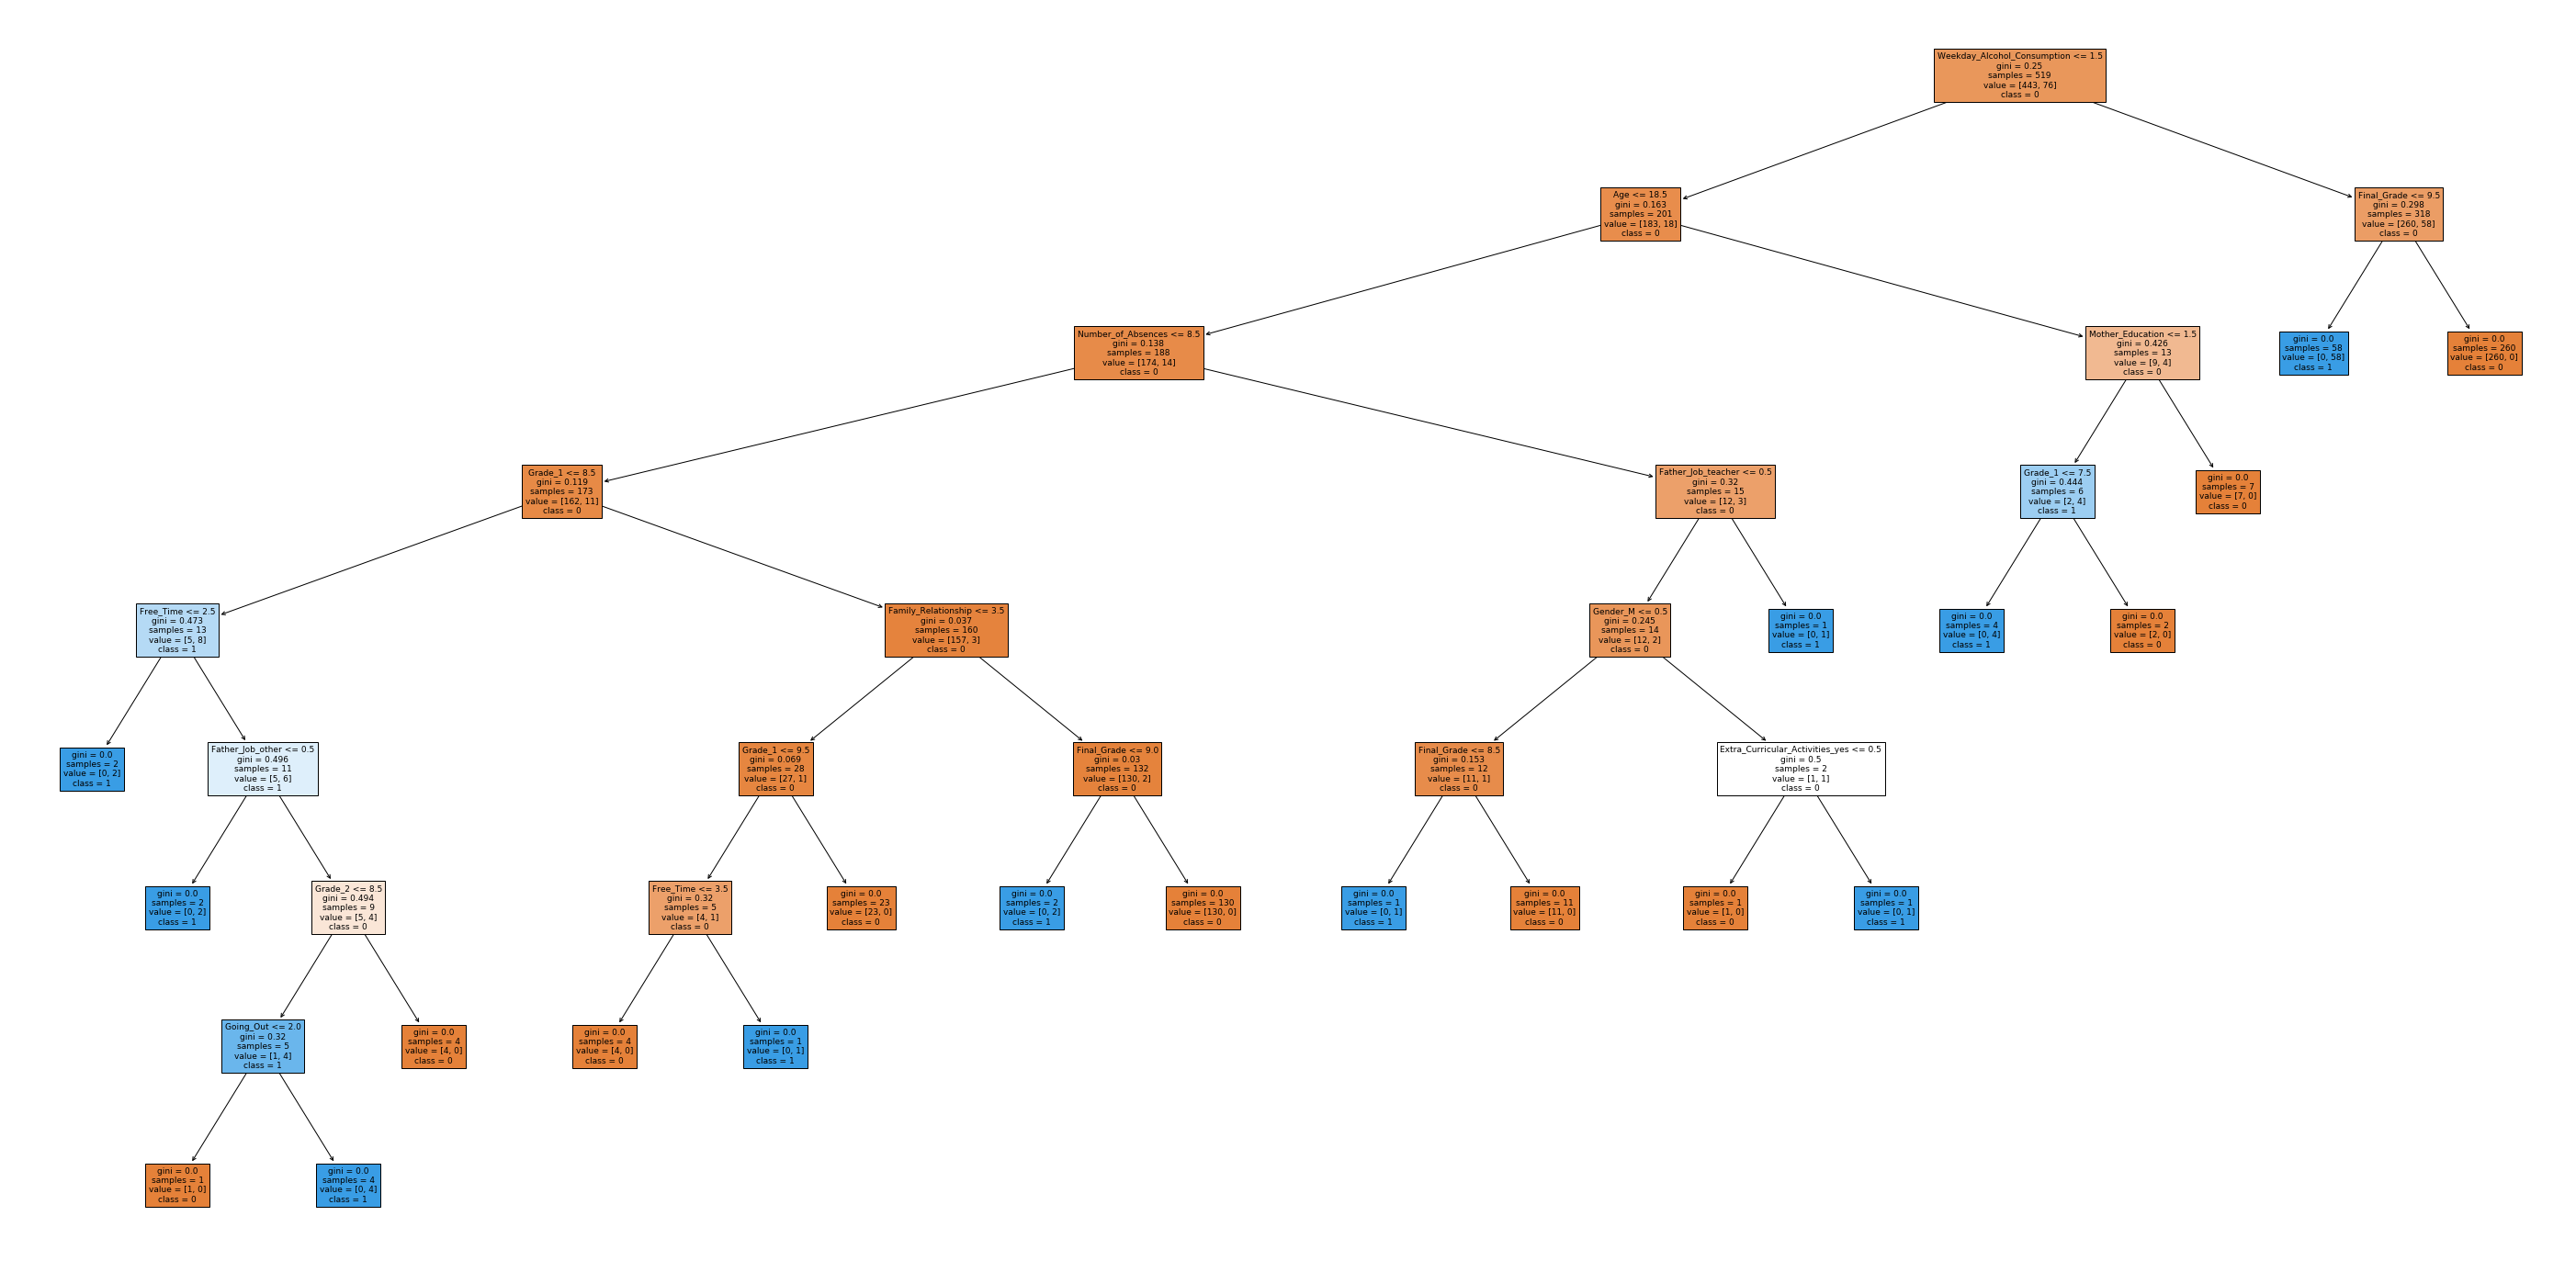

In [87]:
# Decision Tree Web
plt.figure(figsize = (50,25))
plot_tree(dt_model_log, filled=True, feature_names=X.columns, class_names = [str(c) for c in dt_model_log.classes_])
plt.show()